### Importing Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from datetime import date

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

<hr>

### Importing data

In [69]:
data_train = pd.read_csv("DataSet/train.csv")

In [70]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [71]:
data_train.shape

(14999, 9)

<hr>

### EDA and Data Pre-Processing

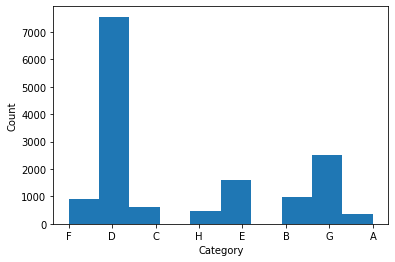

In [72]:
# Univariate Analysis

plt.hist(data_train["category"])
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [73]:
data_train["category"].value_counts()

D    7558
G    2498
E    1614
B     988
F     899
C     615
H     462
A     365
Name: category, dtype: int64

There are more videos in the category D, followed by category G.

<hr>

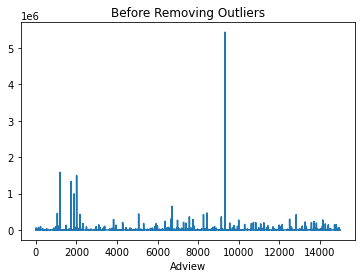

In [74]:
# Univariate Analysis

plt.plot(data_train["adview"])
plt.title("Before Removing Outliers")
plt.xlabel("Adview")
plt.show()

There are outliers in the data

In [75]:
# Removing outliers
data_train = data_train[data_train["adview"] <2000000]

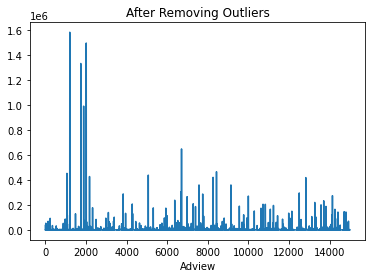

In [76]:
plt.plot(data_train["adview"])
plt.title("After Removing Outliers")
plt.xlabel("Adview")
plt.show()

<hr>

In [77]:
data_train[data_train=="F"].count()

vidid          0
adview         0
views          2
likes        155
dislikes     155
comment      233
published      0
duration       0
category     899
dtype: int64

Few attributes of data contains F character : Removing those rows 

In [78]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [79]:
data_train[data_train=="F"].count()

vidid          0
adview         0
views          0
likes          0
dislikes       0
comment        0
published      0
duration       0
category     879
dtype: int64

In [80]:
data_train.shape

(14636, 9)

<hr>

Convert values to integers for views, likes, comments, dislikes and adview

In [81]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [82]:
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

In [83]:
data_train.dtypes

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category     object
dtype: object

<hr>

As Vedio ID doesnot contirbute to adview prediction : Drop vidid column

In [84]:
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,1,666,1,0,0,2016-06-29,PT31S,D


<hr>

Converting duration format in seconds.

In [85]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

In [86]:
mp=data_train["duration"]
time = mp.apply(checki)
time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,457,F
1,2,1707,56,2,6,2016-10-01,570,D
2,1,2023,25,0,2,2016-07-02,136,C
3,6,620860,777,161,153,2016-07-27,262,H
4,1,666,1,0,0,2016-06-29,31,D


In [87]:
data_train["duration"].dtype

dtype('int64')

<hr>

Calculating number of days (today - published date)

In [88]:
today = pd.to_datetime("2020-10-20")
data_train["days"] = pd.to_datetime(data_train["published"])
data_train["days"] = today - data_train["days"]
data_train["days"] = data_train["days"].astype('timedelta64[D]')

print(data_train.head())


   adview    views  likes  dislikes  comment   published  duration category  \
0      40  1031602   8523       363     1095  2016-09-14       457        F   
1       2     1707     56         2        6  2016-10-01       570        D   
2       1     2023     25         0        2  2016-07-02       136        C   
3       6   620860    777       161      153  2016-07-27       262        H   
4       1      666      1         0        0  2016-06-29        31        D   

     days  
0  1497.0  
1  1480.0  
2  1571.0  
3  1546.0  
4  1574.0  


Now, as we have derived days column from published date attribute, we can drop published column.

In [89]:
data_train=data_train.drop(["published"],axis=1)
data_train.head()

,adview,views,likes,dislikes,comment,duration,category,days
0,40,1031602,8523,363,1095,457,F,1497.0
1,2,1707,56,2,6,570,D,1480.0
2,1,2023,25,0,2,136,C,1571.0
3,6,620860,777,161,153,262,H,1546.0
4,1,666,1,0,0,31,D,1574.0


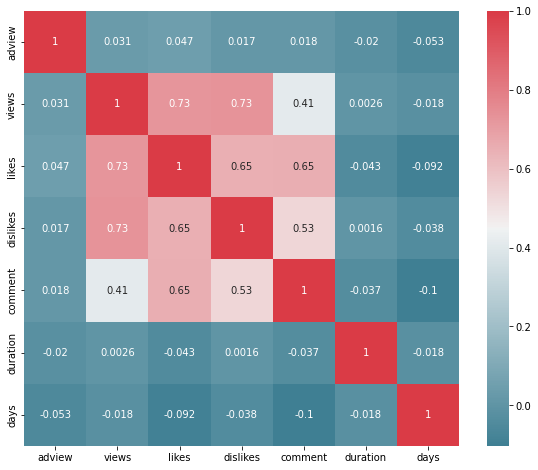

In [90]:
# Heatmap

f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

<hr>

Converting "category" categorical attribute to numerical attribute

In [91]:
category_dummies = pd.get_dummies(data_train.category)
data_train=pd.concat([data_train, category_dummies], axis=1)
data_train.head()

,adview,views,likes,dislikes,comment,duration,category,days,A,B,C,D,E,F,G,H
0,40,1031602,8523,363,1095,457,F,1497.0,0,0,0,0,0,1,0,0
1,2,1707,56,2,6,570,D,1480.0,0,0,0,1,0,0,0,0
2,1,2023,25,0,2,136,C,1571.0,0,0,1,0,0,0,0,0
3,6,620860,777,161,153,262,H,1546.0,0,0,0,0,0,0,0,1
4,1,666,1,0,0,31,D,1574.0,0,0,0,1,0,0,0,0


In [92]:
# Dropping category attribute
data_train=data_train.drop(["category"],axis=1)
data_train.head()

,adview,views,likes,dislikes,comment,duration,days,A,B,C,D,E,F,G,H
0,40,1031602,8523,363,1095,457,1497.0,0,0,0,0,0,1,0,0
1,2,1707,56,2,6,570,1480.0,0,0,0,1,0,0,0,0
2,1,2023,25,0,2,136,1571.0,0,0,1,0,0,0,0,0
3,6,620860,777,161,153,262,1546.0,0,0,0,0,0,0,0,1
4,1,666,1,0,0,31,1574.0,0,0,0,1,0,0,0,0


<hr>

Storing X and Y attributes seperately

In [93]:
Y=data_train["adview"]
data_train=data_train.drop(["adview"],axis=1)
X=data_train

print(Y.head())
print(X.head())

0    40
1     2
2     1
3     6
4     1
Name: adview, dtype: int64
     views  likes  dislikes  comment  duration    days  A  B  C  D  E  F  G  H
0  1031602   8523       363     1095       457  1497.0  0  0  0  0  0  1  0  0
1     1707     56         2        6       570  1480.0  0  0  0  1  0  0  0  0
2     2023     25         0        2       136  1571.0  0  0  1  0  0  0  0  0
3   620860    777       161      153       262  1546.0  0  0  0  0  0  0  0  1
4      666      1         0        0        31  1574.0  0  0  0  1  0  0  0  0


<hr>

Normalization

In [94]:
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
print(X)

[[7.47243238e-03 3.00291730e-02 7.34089668e-03 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.20103309e-05 1.97305372e-04 4.04457117e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.42993928e-05 8.80827555e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.48464626e-05 5.63729635e-05 2.02228559e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.62089412e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.09838750e-04 7.75128248e-05 1.01114279e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


<hr>

### Splitting the data into training and testing data

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [96]:
print("X train: ",X_train.shape)
print("Y train: ",Y_train.shape)
print("X test: ",X_test.shape)
print("Y test: ",Y_test.shape)

X train:  (11708, 14)
Y train:  (11708,)
X test:  (2928, 14)
Y test:  (2928,)


<hr>

### Model Training

Linear Regression

In [97]:
from sklearn import linear_model

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
linear_regression.score(X_test,Y_test)

-0.001232019202607182

Support Vector Regressor

In [99]:
from sklearn.svm import SVR

supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,Y_train)
supportvector_regressor.score(X_test,Y_test)

-0.0034631237736280074

Decision Tree Regressor

In [100]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
decision_tree.score(X_test,Y_test)

-1.7014975509829076

Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,Y_train)
random_forest.score(X_test,Y_test)

0.17328056585699358

<hr>

### Evaluation metrics

In [102]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [104]:
# Linear Regression

print_error(X_test,Y_test, linear_regression)

Mean Absolute Error: 3552.1629098360654
Mean Squared Error: 831833483.4641393
Root Mean Squared Error: 28841.523598175936


In [105]:
# Support Vector Regressor

print_error(X_test,Y_test, supportvector_regressor)

Mean Absolute Error: 1696.9898276875592
Mean Squared Error: 833687107.251324
Root Mean Squared Error: 28873.640353293245


In [106]:
# Decision Tree Regressor

print_error(X_test,Y_test, decision_tree)

Mean Absolute Error: 3054.441256830601
Mean Squared Error: 2244430936.3913937
Root Mean Squared Error: 47375.425448130736


In [107]:
# Random Forest Regressor

print_error(X_test,Y_test, random_forest)

Mean Absolute Error: 2936.79982041751
Mean Squared Error: 686846698.4289672
Root Mean Squared Error: 26207.760271128995


Random forest regressor works better.

<hr>

### Saving the model

In [108]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "randomforest_youtubeadview.pkl")

['randomforest_youtubeadview.pkl']

<hr>